In [0]:
#@title Download dataset

from google.colab import files
files.upload()

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [0]:
train_df = pd.read_csv("training.csv")
test_df = pd.read_csv("predict.csv")

In [60]:
train_df.shape

(9418, 72)

In [61]:
train_df.head()

,id,posted_time,updated_time,age,updated_age,app_type,owner_id,owner_type,owner_influence,number_of_likes,number_of_comments,reactivity,is_mentions_me,is_mentions_connections,is_commented_by_me,is_commented_by_connections,is_liked_by_me,is_liked_by_connections,poster_id,poster_gender,poster_is_employee,poster_is_lead,poster_is_in_connections,poster_focus,poster_order,poster_influence,participant1_id,participant1_action,participant1_gender,participant1_is_employee,participant1_is_lead,participant1_is_in_connections,participant1_focus,participant1_order,participant1_influence,participant2_id,participant2_action,participant2_gender,participant2_is_employee,participant2_is_lead,participant2_is_in_connections,participant2_focus,participant2_order,participant2_influence,participant3_id,participant3_action,participant3_gender,participant3_is_employee,participant3_is_lead,participant3_is_in_connections,participant3_focus,participant3_order,participant3_influence,participant4_id,participant4_action,participant4_gender,participant4_is_employee,participant4_is_lead,participant4_is_in_connections,participant4_focus,participant4_order,participant4_influence,participant5_id,participant5_action,participant5_gender,participant5_is_employee,participant5_is_lead,participant5_is_in_connections,participant5_focus,participant5_order,participant5_influence,rank
0,175339,1.514050e+12,1.514050e+12,6.315242e+10,6.315242e+10,other,57727,space,0.99973,1,0,1.00000,0,0,0,0,0,1,5,male,1,0,1,marketing,6,0.99962,146,liked,male,1,0,1,marketing,5,0.99899,22636,viewed,male,0,0,1,other,4,0.23077,3080,viewed,male,0,0,1,marketing,3,0.23077,44661,viewed,male,0,0,1,other,2,0.23077,3089,viewed,male,0,0,1,other,1,0.23077,0.73677
1,175348,1.514110e+12,1.515160e+12,6.309278e+10,6.204696e+10,forum,111913,space,0.99977,0,2,0.12336,0,0,0,1,0,0,146,male,1,0,1,marketing,6,0.99899,13659,commented,male,0,0,0,other,5,0.99756,146,commented,male,1,0,1,marketing,4,0.99899,22636,viewed,male,0,0,1,other,3,0.23077,3080,viewed,male,0,0,1,marketing,2,0.23077,44661,viewed,male,0,0,1,other,1,0.23077,0.78240
2,175353,1.514120e+12,1.515160e+12,6.309049e+10,6.204716e+10,forum,111913,space,0.99977,0,3,0.12336,0,0,0,1,0,0,146,male,1,0,1,marketing,6,0.99899,13659,commented,male,0,0,0,other,5,0.99756,13,commented,male,1,0,1,marketing,4,0.99895,146,commented,male,1,0,1,marketing,3,0.99899,22636,viewed,male,0,0,1,other,2,0.23077,3080,viewed,male,0,0,1,marketing,1,0.23077,0.82125
3,175371,1.514190e+12,1.514190e+12,6.301324e+10,6.301324e+10,other,9037,space,0.99949,0,0,0.00000,0,0,0,0,0,0,7,male,1,0,1,marketing,6,0.99886,22636,viewed,male,0,0,1,other,5,0.23077,3080,viewed,male,0,0,1,marketing,4,0.23077,44661,viewed,male,0,0,1,other,3,0.23077,3089,viewed,male,0,0,1,other,2,0.23077,3084,viewed,male,0,0,1,marketing,1,0.23077,0.61522
4,175372,1.514190e+12,1.514190e+12,6.301323e+10,6.301323e+10,other,9037,space,0.99949,0,0,0.00000,0,0,0,0,0,0,7,male,1,0,1,marketing,6,0.99886,22636,viewed,male,0,0,1,other,5,0.23077,3080,viewed,male,0,0,1,marketing,4,0.23077,44661,viewed,male,0,0,1,other,3,0.23077,3089,viewed,male,0,0,1,other,2,0.23077,3084,viewed,male,0,0,1,marketing,1,0.23077,0.61522


# **Age column investigation**
Here I'll research and investigate how do we can proceed with 'age' column

In [0]:
import datetime
import time

# date of dataset creation
DATE = '4/02/2020'

current_date = datetime.datetime.strptime(DATE, "%d/%m/%Y")
current_secs = time.mktime(current_date.timetuple())

In [0]:
def get_date(secs):
  return datetime.datetime.fromtimestamp(current_secs - secs).strftime("%A, %B %d, %Y %I:%M:%S")

In [0]:
# convert time from miliseconds to seconds
train_df.age /= 1000

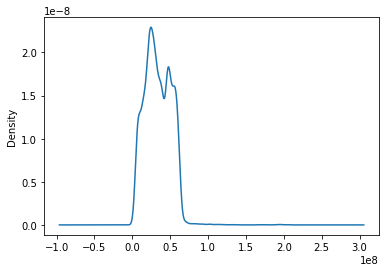

In [65]:
train_df.age.plot.kde()

In [66]:
train_df.age.describe()

count    9.418000e+03
mean     3.393422e+07
std      1.738314e+07
min      4.147070e+06
25%      2.108517e+07
50%      3.214917e+07
75%      4.719412e+07
max      2.050660e+08
Name: age, dtype: float64

In [67]:
# first day of the 2018 year, all previous dates will be removed from the dataset
get_date(6.6 * 1e+07)

'Monday, January 01, 2018 02:40:00'

In [68]:
filtered_data = [e for e in  filter(lambda x : x < 6.6 * 1e+07, sorted(train_df.age))]
len(filtered_data)

9339

In [0]:
# remove all dates before 2018 year
train_df = train_df[train_df.age.isin(filtered_data)]

In [70]:
train_df.age.describe()

count    9.339000e+03
mean     3.339512e+07
std      1.605928e+07
min      4.147070e+06
25%      2.100618e+07
50%      3.193247e+07
75%      4.697468e+07
max      6.472692e+07
Name: age, dtype: float64

In [71]:
# first and  last days of new data
get_date(4.147070e+06), get_date(6.472692e+07)

('Wednesday, December 18, 2019 12:02:10', 'Monday, January 15, 2018 08:18:00')

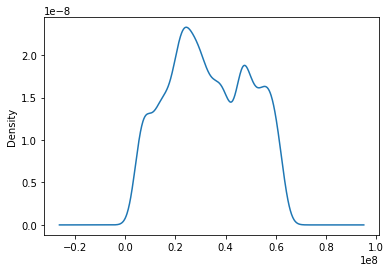

In [72]:
train_df.age.plot.kde()

In [0]:
# function to count number of post in each month for 2018 and 2019 years
def count_posts_per_month(ages):
  dates = [get_date(a) for a in ages]

  months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
  
  count_2018 = {m : 0 for m in months}
  count_2019 = {m : 0 for m in months}


  for date in dates:
    date_splitted = date.split(" ")
    month = date_splitted[1]
    year = date_splitted[3]

    if year == "2018":
      count_2018[month] += 1
    elif year == "2019":
      count_2019[month] += 1
    else:
      print(date)
  
  return count_2018, count_2019


In [0]:
def plot_posts_by_month(counts):
  plt.bar(range(len(counts)), list(counts.values()), align='center')
  plt.xticks(range(len(counts)), list(counts.keys()))
  plt.show()


In [0]:
counts = count_posts_per_month(filtered_data)

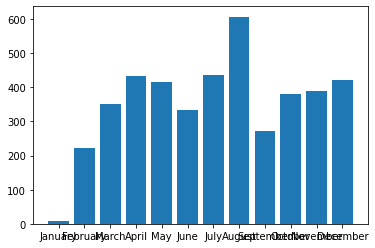

In [76]:
# 2018 year
plot_posts_by_month(counts[0])

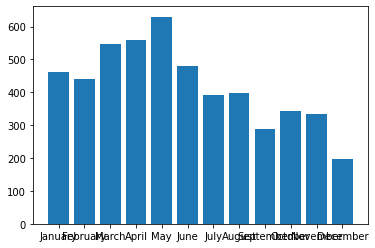

In [77]:
# 2019 year
plot_posts_by_month(counts[1])